In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('../data/exams.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define the features (X) and targets (y)
X = df.drop(columns=['math score', 'reading score', 'writing score'])
y = df[['math score', 'reading score', 'writing score']]

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the MSEs for each fold
mse_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_val_pred = model.predict(X_val)
    
    # Calculate MSE for each target variable
    mse = mean_squared_error(y_val, y_val_pred, multioutput='raw_values')
    mse_scores.append(mse)
    
    # Print the MSE for this fold
    print("MSE for this fold:")
    print(f"Math score MSE: {mse[0]:.2f}")
    print(f"Reading score MSE: {mse[1]:.2f}")
    print(f"Writing score MSE: {mse[2]:.2f}")
    print("")

# Convert list of MSEs into a numpy array for easier calculations
mse_scores = np.array(mse_scores)

# Calculate the mean MSE across all folds
mean_mse = mse_scores.mean(axis=0)

print("Mean MSE across all folds:")
print(f"Math score MSE: {mean_mse[0]:.2f}")
print(f"Reading score MSE: {mean_mse[1]:.2f}")
print(f"Writing score MSE: {mean_mse[2]:.2f}")

MSE for this fold:
Math score MSE: 168.48
Reading score MSE: 157.94
Writing score MSE: 165.55

MSE for this fold:
Math score MSE: 203.04
Reading score MSE: 189.25
Writing score MSE: 187.20

MSE for this fold:
Math score MSE: 201.22
Reading score MSE: 178.47
Writing score MSE: 179.52

MSE for this fold:
Math score MSE: 207.03
Reading score MSE: 183.16
Writing score MSE: 189.56

MSE for this fold:
Math score MSE: 207.51
Reading score MSE: 214.47
Writing score MSE: 212.56

Mean MSE across all folds:
Math score MSE: 197.46
Reading score MSE: 184.66
Writing score MSE: 186.88


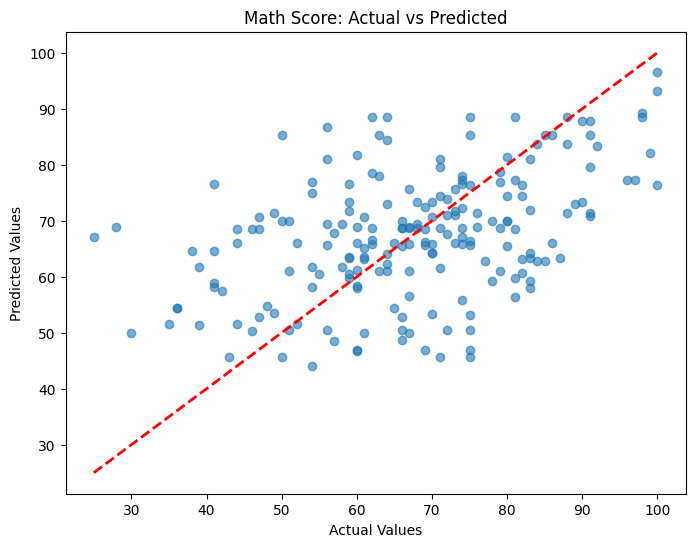

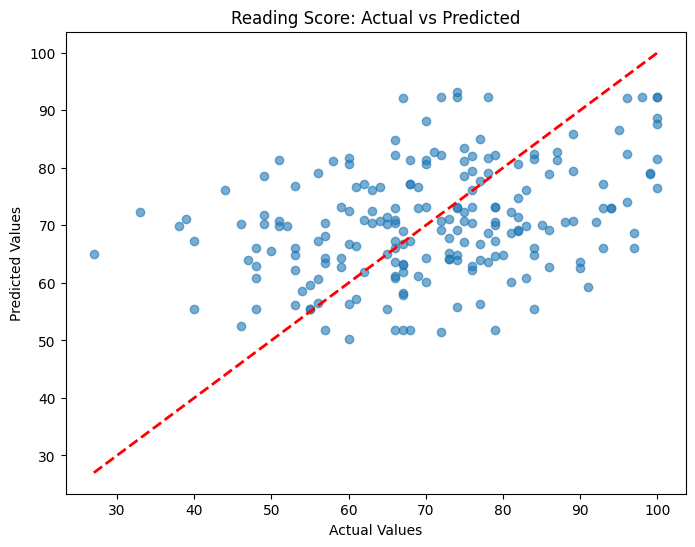

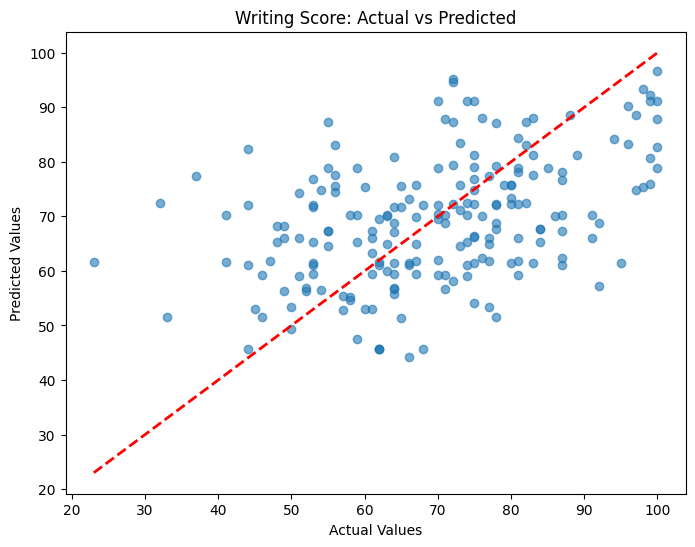

In [2]:

# Plotting predicted vs actual values for the last fold
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

# Math score plot for the last fold
plot_predictions(y_val['math score'], y_val_pred[:, 0], 'Math Score: Actual vs Predicted')

# Reading score plot for the last fold
plot_predictions(y_val['reading score'], y_val_pred[:, 1], 'Reading Score: Actual vs Predicted')

# Writing score plot for the last fold
plot_predictions(y_val['writing score'], y_val_pred[:, 2], 'Writing Score: Actual vs Predicted')